In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set overall style
sns.set(style="whitegrid", context="talk")

In [3]:
# Define distinct colors for each technique
tech_colors = {
    "Weight decay":       "#1f77b4",  # muted blue
    "Japanese hammer":    "#ff7f0e",  # orange
    "Stiefel reg.":       "#2ca02c",  # green
    "Stiefel manifold":   "#d62728",  # red
    "Hard cap":           "#9467bd",  # purple
    "Soft cap":           "#8c564b",  # brown
    "Baseline":           "#7f7f7f",  # gray
}

In [4]:
# Generate synthetic example data
x = np.linspace(0, 1, 100)

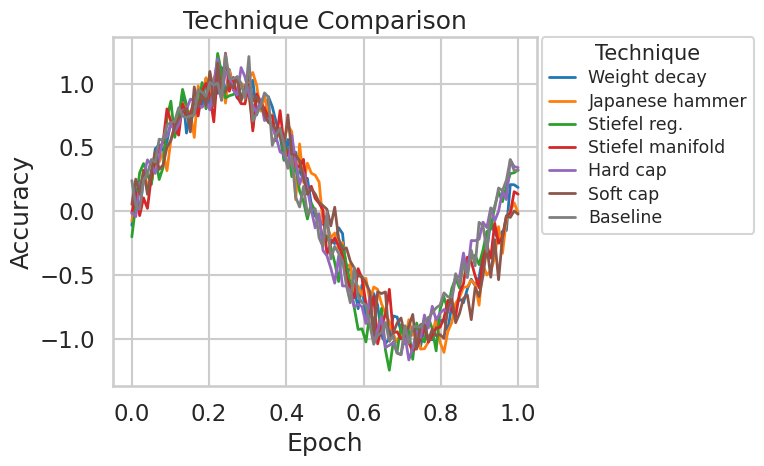

In [5]:
# 1) Comparison Across All Techniques
plt.figure(figsize=(8, 5))
for tech, color in tech_colors.items():
    y = np.sin(2 * np.pi * x * (1 + 0.1 * np.random.rand())) + np.random.normal(scale=0.1, size=x.shape)
    plt.plot(x, y, label=tech, color=color, linewidth=2)
plt.title("Technique Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(title="Technique", bbox_to_anchor=(1.01, 1), loc="upper left", 
           fontsize='x-small', title_fontsize='small', borderaxespad=0,
           labelspacing=0.3, handlelength=1.5)
plt.tight_layout()
plt.show()

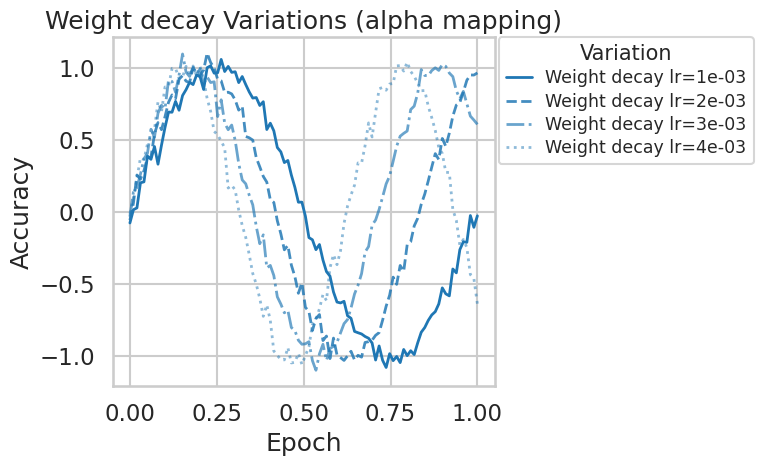

In [ ]:
# 2) Variations Within One Technique (Weight decay learning rate search)
#! When we vary within one technique, we can use the same color for all lines
#! but we will vary both the alpha (opacity) and linestyle to distinguish them
base_tech = "Weight decay"
base_color = tech_colors[base_tech]  # e.g. "#1f77b4"
n_colors = 4

# Generate alpha values from 1.0 down to 0.25, these determine opacity
alphas = np.linspace(1.0, 0.5, n_colors)
line_styles = ['-', '--', '-.', ':'] #! look up more line styles in matplotlib if you need more

plt.figure(figsize=(8, 5))
for idx, (alpha, ls) in enumerate(zip(alphas, line_styles)):
    lr = 1e-3 * (idx + 1)
    y = np.sin(2 * np.pi * x * (1 + 0.2 * idx)) + np.random.normal(scale=0.05, size=x.shape)
    plt.plot(x, y,
             label=f"{base_tech} lr={lr:.0e}",
             color=base_color,
             alpha=alpha,
             linestyle=ls,
             linewidth=2)

plt.title(f"{base_tech} Variations (alpha mapping)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(title="Variation", bbox_to_anchor=(1.01, 1), loc="upper left", 
           fontsize='x-small', title_fontsize='small', borderaxespad=0,
           labelspacing=0.3, handlelength=1.5)
plt.tight_layout()
plt.show()

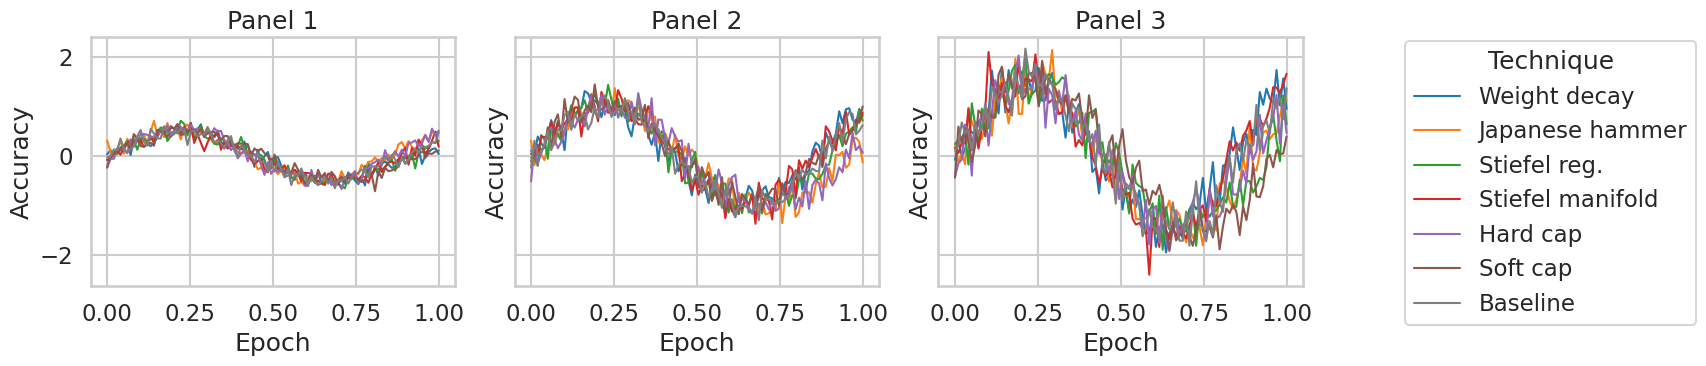

In [7]:
# 3) Panel of Plots with Single Shared Legend on Right
n_panels = 3
fig, axes = plt.subplots(1, n_panels, figsize=(15, 4), sharex=True, sharey=True)

for idx, ax in enumerate(axes):
    amplitude = 0.5 + 0.5 * idx
    for tech, color in tech_colors.items():
        y = amplitude * np.sin(2 * np.pi * x * (1 + 0.2 * np.random.rand())) \
            + np.random.normal(scale=0.1 * (idx + 1), size=x.shape)
        ax.plot(x, y, label=tech, color=color, linewidth=1.5)
    ax.set_title(f"Panel {idx+1}")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Technique", loc="center right",
           bbox_to_anchor=(1.15, 0.5), ncol=1)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

In [8]:
# Print the final tech_colors mapping for reference
print("Final color mapping:")
for tech, color in tech_colors.items():
    print(f"  {tech}: {color}")

Final color mapping:
  Weight decay: #1f77b4
  Japanese hammer: #ff7f0e
  Stiefel reg.: #2ca02c
  Stiefel manifold: #d62728
  Hard cap: #9467bd
  Soft cap: #8c564b
  Baseline: #7f7f7f
